In [131]:
# Import dependancies etc.
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn as sns; sns.set()
from sklearn.preprocessing import scale
import random
%matplotlib inline

In [132]:
# Load data from csv file
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True) #shuffle rows
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   73542.0  1.237436  0.710635 -0.349188  1.353498  0.066032 -1.249346   
1  143328.0  2.053311  0.089735 -1.681836  0.454212  0.298310 -0.953526   
2   35791.0  1.091789 -0.015625  0.458926  1.351294 -0.385902 -0.019570   
3  124926.0  1.904181 -0.740166 -0.364440  0.285589 -1.041125 -0.670430   
4  140314.0 -1.075204  1.801779 -1.571360 -0.465200  0.070828 -0.250740   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.298167 -0.233835 -0.059812  ... -0.070076 -0.138806 -0.121076  0.246508   
1  0.152003 -0.207071  0.587335  ... -0.361158 -0.984262  0.354198  0.620709   
2 -0.165639  0.238438  0.339849  ... -0.056867 -0.085355 -0.030145  0.186825   
3 -0.674618  0.003391  1.751627  ...  0.186645  0.614161  0.105259 -0.020116   
4 -1.029919 -1.940055 -0.307113  ... -0.905921  1.325697 -0.002637 -1.002376   

        V25       V26       V27       V28  Amount  Class  
0  0.684126 -0.326719  0.033903  0.057062    1.00      0  
1 -0.297138  0.166736 -0.068299 -0.029585    8.99      0  
2  0.531039 -0.336489  0.020972  0.004616   15.75      0  
3 -0.231520  0.127055 -0.002947 -0.037451   55.95      0  
4 -0.248044 -0.100465 -0.039940  0.045071    1.00      0  

[5 rows x 31 columns]

In [133]:
# Have a quick look at the main characteristics of the data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.177356e-15  3.379236e-16 -1.400344e-15  2.094503e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.006012e-15  1.494648e-15 -5.641790e-16  1.145622e-16 -2.411944e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.615771e-16 -3.501233e-16  2.632786e-16  4.473216e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.139832e-16  1.685377e-15 -3.663396e-16 -1.221839e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [134]:
# Data has no missing values

In [135]:
# Make dataframe of all fraudulant transactions
fraud = df.loc[df['Class'] == 1]

# Make dataframe of all regular, non-fraudulant transactions
non_frauds = df.loc[df['Class'] == 0]

# Print basic fraud information on dataset
non_fraud_rate_percent = 100*(len(non_frauds)/(len(fraud)+len(non_frauds)))
fraud_rate_percent = 100*(len(fraud)/(len(fraud)+len(non_frauds)))

print ('There are', (len(fraud)), 'cases of fraudulant activity in a total of', (len(fraud))+(len(non_frauds)), 'transactions')
print ('')
print (f'Percentage of regular transactions is {non_fraud_rate_percent:.3f}%')
print ('')
print (f'Percentage of fraudulant transactions is {fraud_rate_percent:.3f}%')

There are 492 cases of fraudulant activity in a total of 284807 transactions

Percentage of regular transactions is 99.827%

Percentage of fraudulant transactions is 0.173%


In [136]:
# The data is clearly very unbalanced

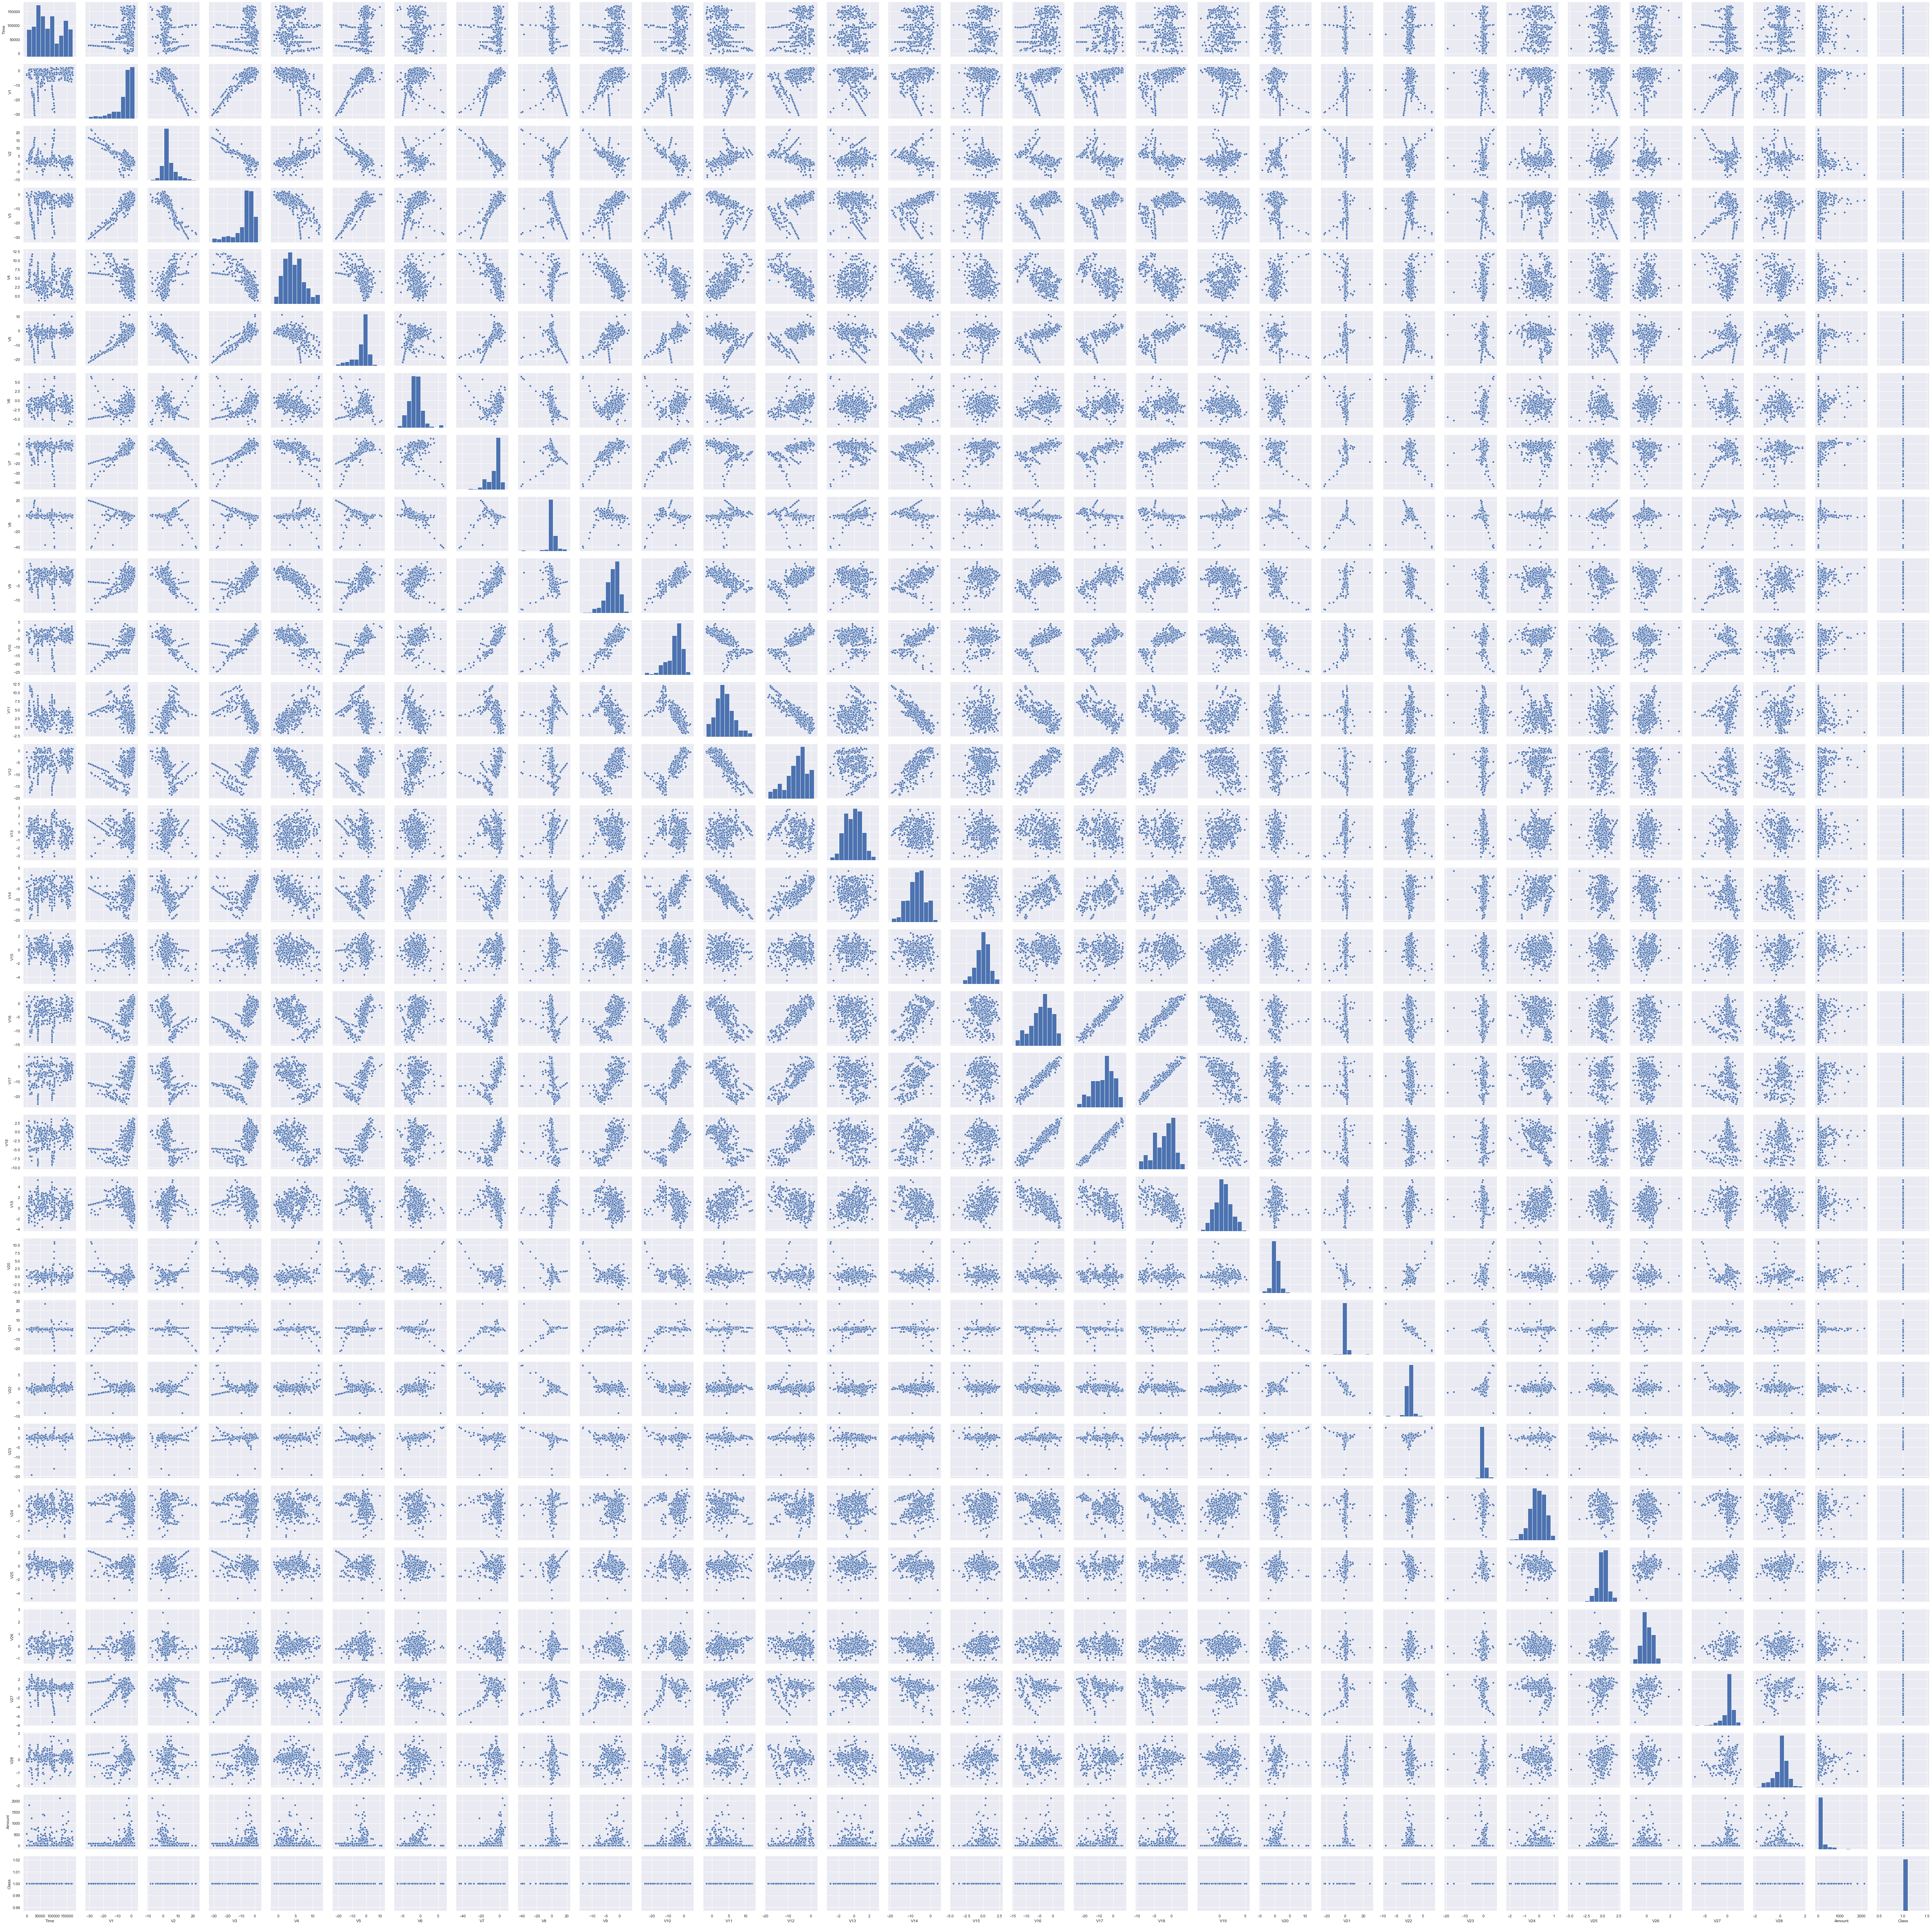

In [137]:
# Show a pairs plot of fraud data
sns.pairplot(fraud);
plt.show()

In [138]:
# The pairs plots highlight interesting patterns of data
# The data plotted below from columns V3 & V16 show interesting clusters which invite further investigation

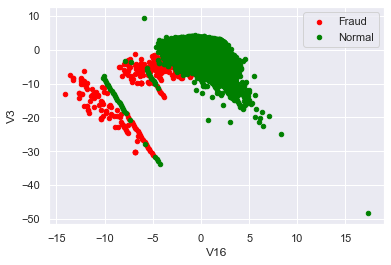

In [139]:
ax = fraud.plot.scatter(x='V16',y='V3', color='Red', label='Fraud')
non_frauds.plot.scatter(x='V16', y='V3', color='Green', label='Normal', ax=ax)
plt.show()

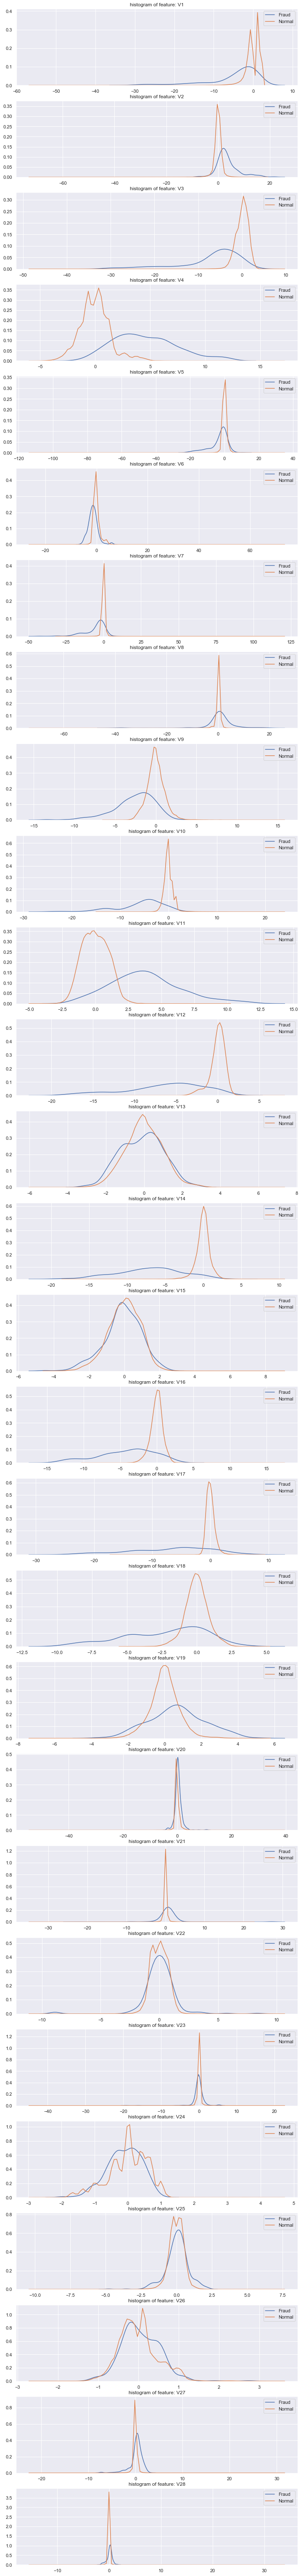

In [140]:
# To visualise the data further, an interesting plot is to see the data distribution comparisons between fruadulant and non fraudulant transactions
# Offset data distributions indicate features that are the most significant  for model training

import matplotlib.gridspec as gridspec
# Create file of the 'V' variable features
v_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,label="Fraud", hist=False)
    sns.distplot(df[cn][df.Class == 0], bins=50,label="Normal", hist=False)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+cn)
plt.show()

In [141]:
# Performing logistic regression

# Split dataframe into training & test data sets with a test data size of 30%
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [142]:
# Define regression model
logistic = linear_model.LogisticRegression(C=1e5)
# Train model
logistic.fit(X_train, y_train)
print ('Score:', logistic.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9990637032875719


In [143]:
# Due to the unbalanced nature of the data, it is difficult to establish a good measure of performance.
# Assuming all the data is non fraudulant results in a Score of over 99.8% 
# Attempts were made using different train-test splits, but the effects were minimal.